In [170]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [3]:
df = yf.Ticker("TSM").history(period="5y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-06-25 00:00:00-04:00,32.229705,32.460553,32.007737,32.416157,10528100,1.345,0.0
2018-06-26 00:00:00-04:00,32.256344,32.584856,32.061012,32.371765,8817000,0.000,0.0
2018-06-27 00:00:00-04:00,32.185316,32.247466,31.528290,31.528290,8798100,0.000,0.0
2018-06-28 00:00:00-04:00,31.519401,31.910063,31.386219,31.910063,7199000,0.000,0.0
2018-06-29 00:00:00-04:00,32.451672,32.647004,32.354005,32.460552,8088200,0.000,0.0
...,...,...,...,...,...,...,...
2023-06-16 00:00:00-04:00,105.430000,105.750000,104.349998,104.570000,11427300,0.000,0.0
2023-06-20 00:00:00-04:00,104.180000,104.879997,103.070000,103.980003,9295500,0.000,0.0
2023-06-21 00:00:00-04:00,103.150002,103.730003,101.620003,101.639999,9340400,0.000,0.0


In [4]:
df = df.filter(['Close'])
df

,Close
Date,
2018-06-25 00:00:00-04:00,32.416157
2018-06-26 00:00:00-04:00,32.371765
2018-06-27 00:00:00-04:00,31.528290
2018-06-28 00:00:00-04:00,31.910063
2018-06-29 00:00:00-04:00,32.460552
...,...
2023-06-16 00:00:00-04:00,104.570000
2023-06-20 00:00:00-04:00,103.980003
2023-06-21 00:00:00-04:00,101.639999


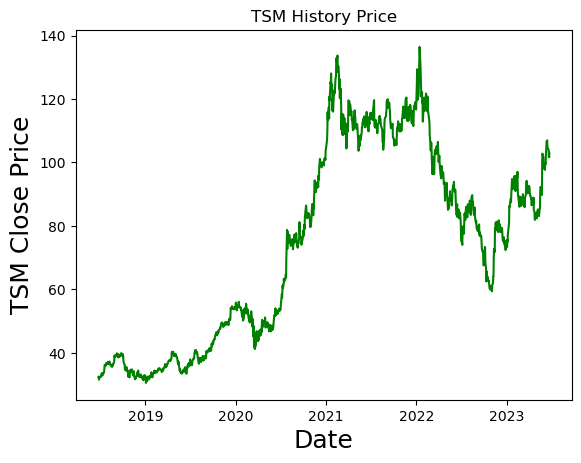

In [5]:
plt.plot(df['Close'], color='green')
plt.ylabel('TSM Close Price', fontsize=18)
plt.title('TSM History Price')
plt.xlabel('Date', fontsize=18)

plt.show()

In [6]:
split =int(0.8*df.shape[0])
Train,Test  = df[0:split] , df[split:]

val_split=int(0.8*Train.shape[0])
Train,Val=Train[0:val_split] , Train[val_split:]
Val=Val.reset_index(drop=True)
Test=Test.reset_index(drop=True)

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1) 
train_set= Train.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
val_set= Val.values.reshape(-1,1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1,1)
test_set_scaled = sc.transform(test_set)

X_train = [] 
y_train = []
for i in range(5,len(train_set)):
    X_train.append(training_set_scaled[i-5:i]) 
    y_train.append(training_set_scaled[i]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = [] 
y_val = []
for i in range(5,len(val_set)):
    X_val.append(val_set_scaled[i-5:i]) 
    y_val.append(val_set_scaled[i]) 
X_val, y_val = np.array(X_val), np.array(y_val) 
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5,len(test_set)):
    X_test.append(test_set_scaled[i-5:i]) 
    y_test.append(test_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test) 
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [8]:
X_train[0]

array([[0.01850206],
       [0.0180718 ],
       [0.0098965 ],
       [0.0135968 ],
       [0.01893236]])

In [93]:
keras.backend.clear_session()
model = keras.models.Sequential([
    GRU(32, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
opt=Adam(learning_rate=0.002,beta_1=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3360      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/300
25/25 [==============================] - 3s 18ms/step - loss: 0.1017 - val_loss: 0.0035
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0241
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0083
Epoch 4/300
25/25 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 6.2845e-04 - val_loss: 0.0011
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 5.0047e-04 - val_loss: 0.0012
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 4.0900e-04 - val_loss: 0.0010
Epoch 8/300
25/25 [==============================] - 0s 4ms/step - loss: 4.0836e-04 - val_loss: 8.9905e-04
Epoch 9/300
25/25 [==============================] - 0s 4ms/step - loss: 3.8013e-04 - val_loss: 9.7040e-04
Epoch 10/300
25/25 [==============================] - 0s 4ms/step - loss: 3.7578

In [95]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

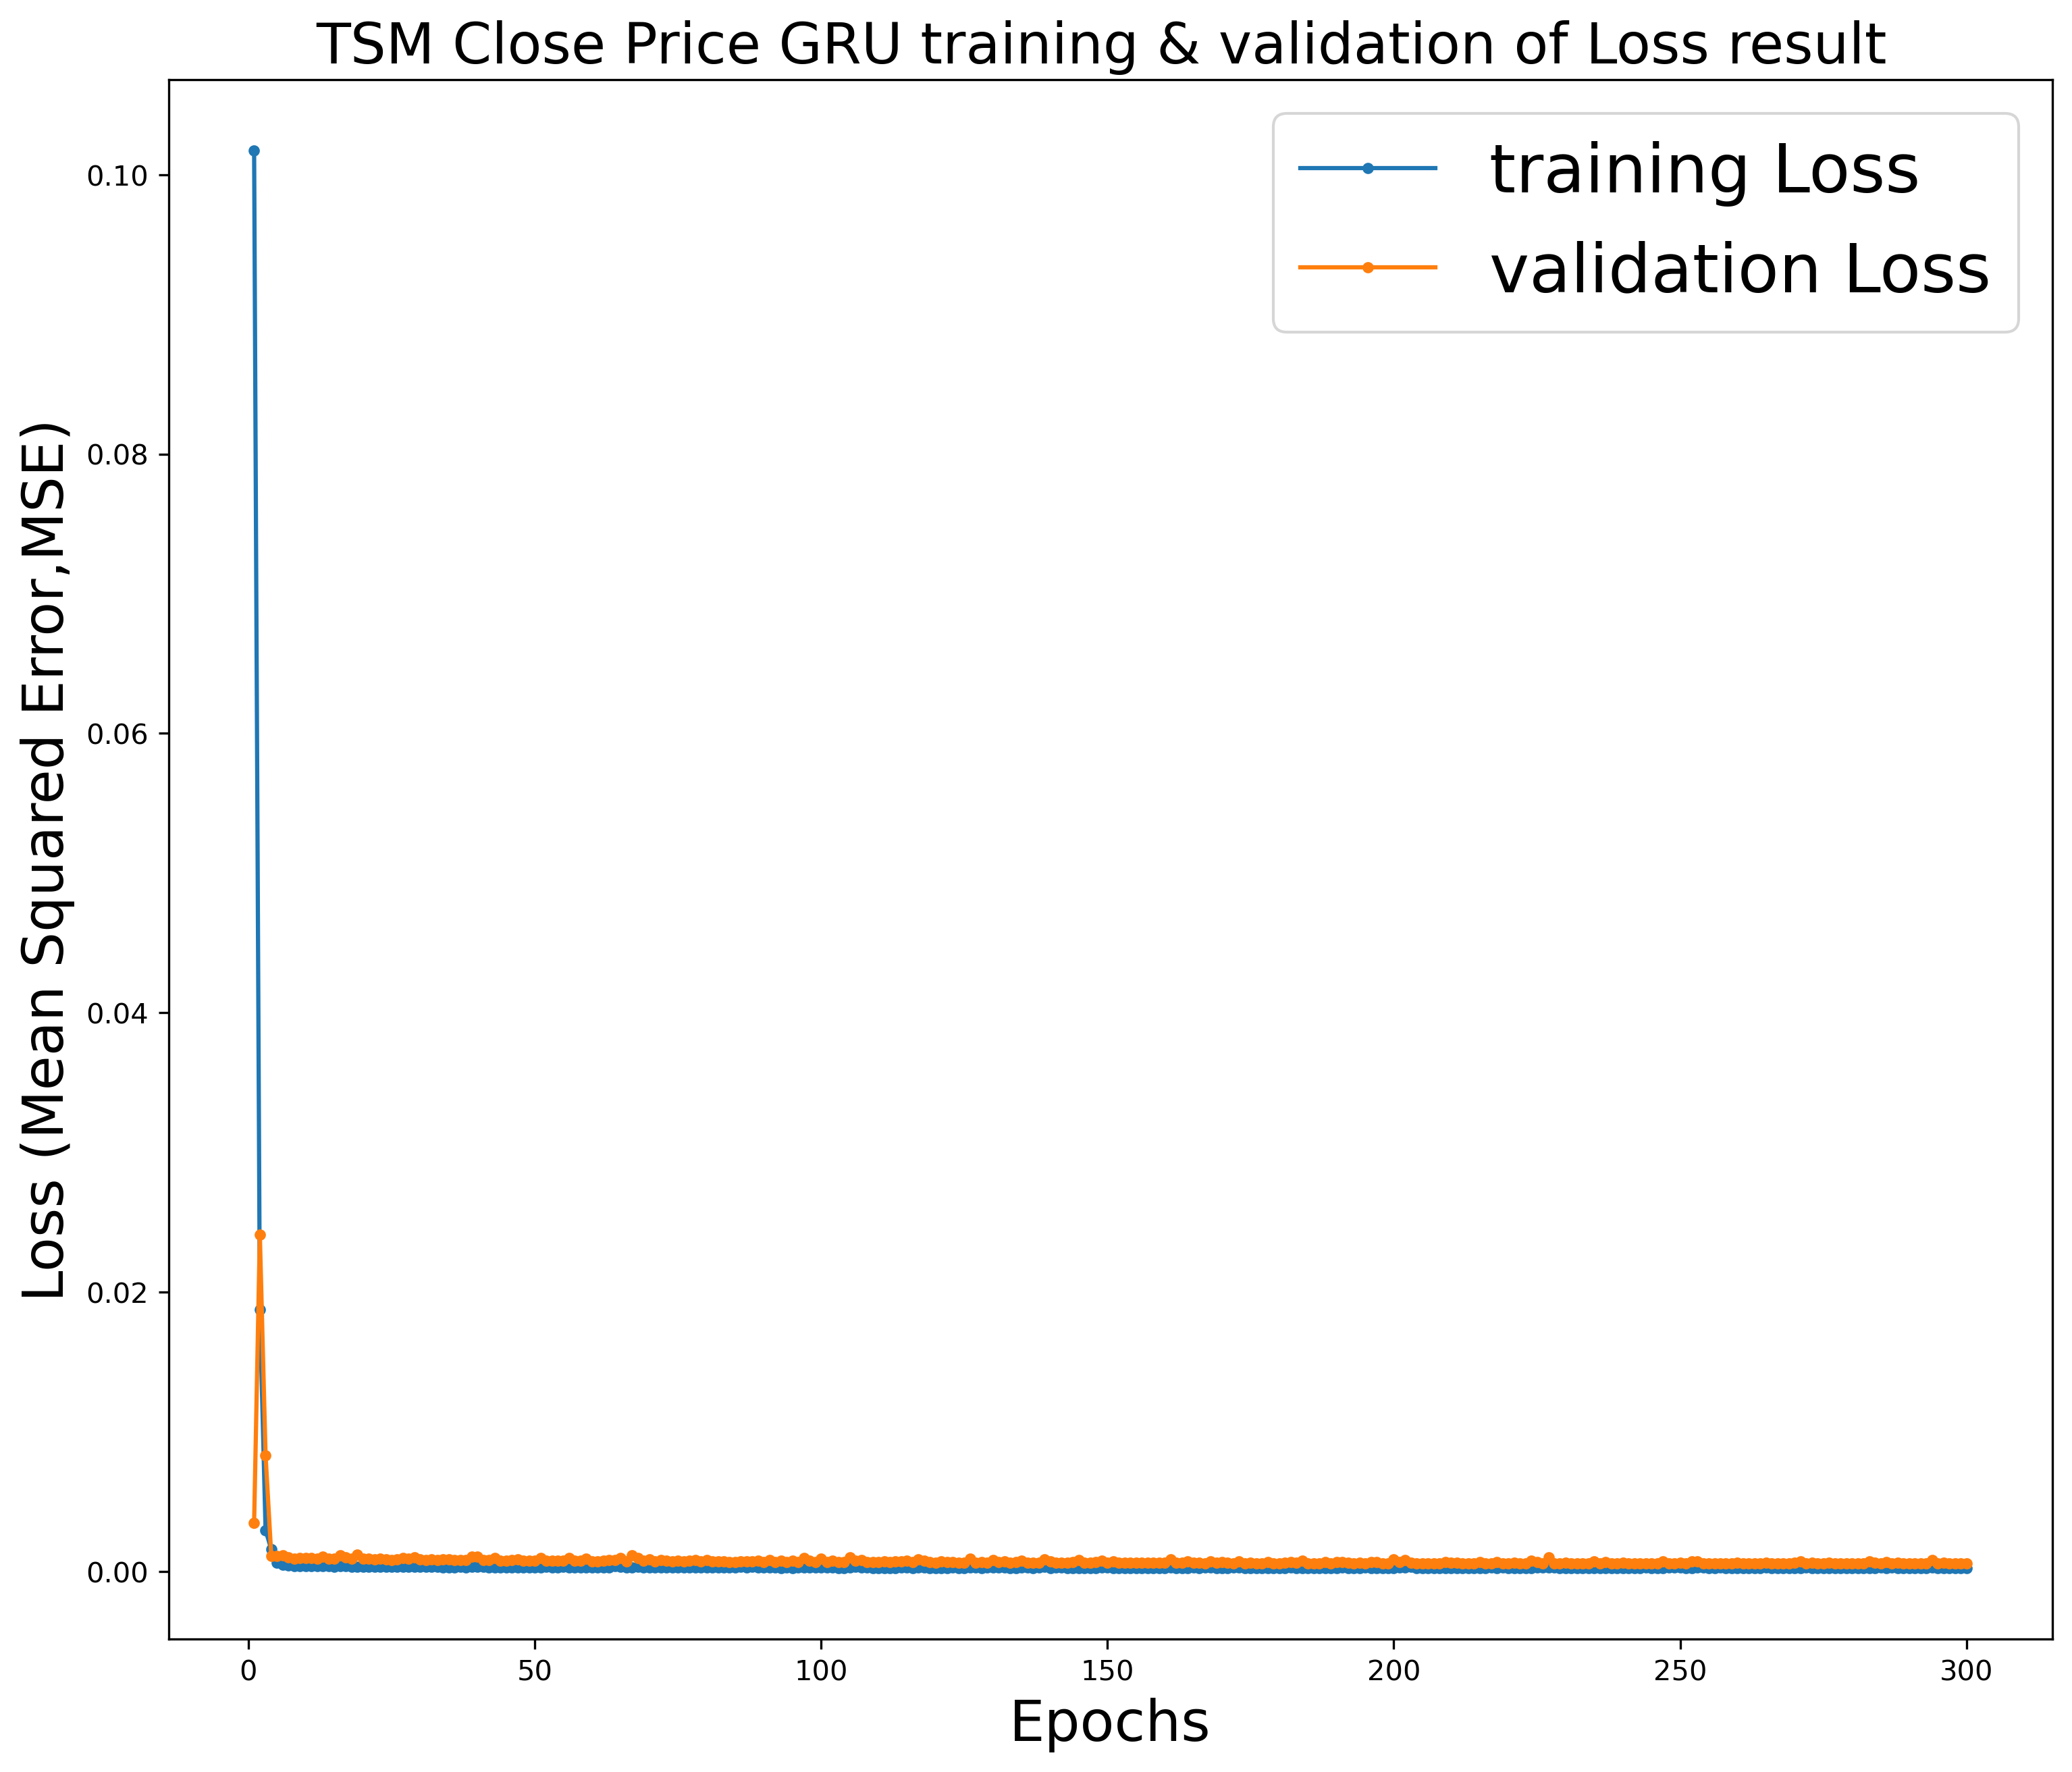

In [96]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('TSM Close Price GRU training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [97]:
predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

8/8 [==============================] - 0s 1ms/step


In [98]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

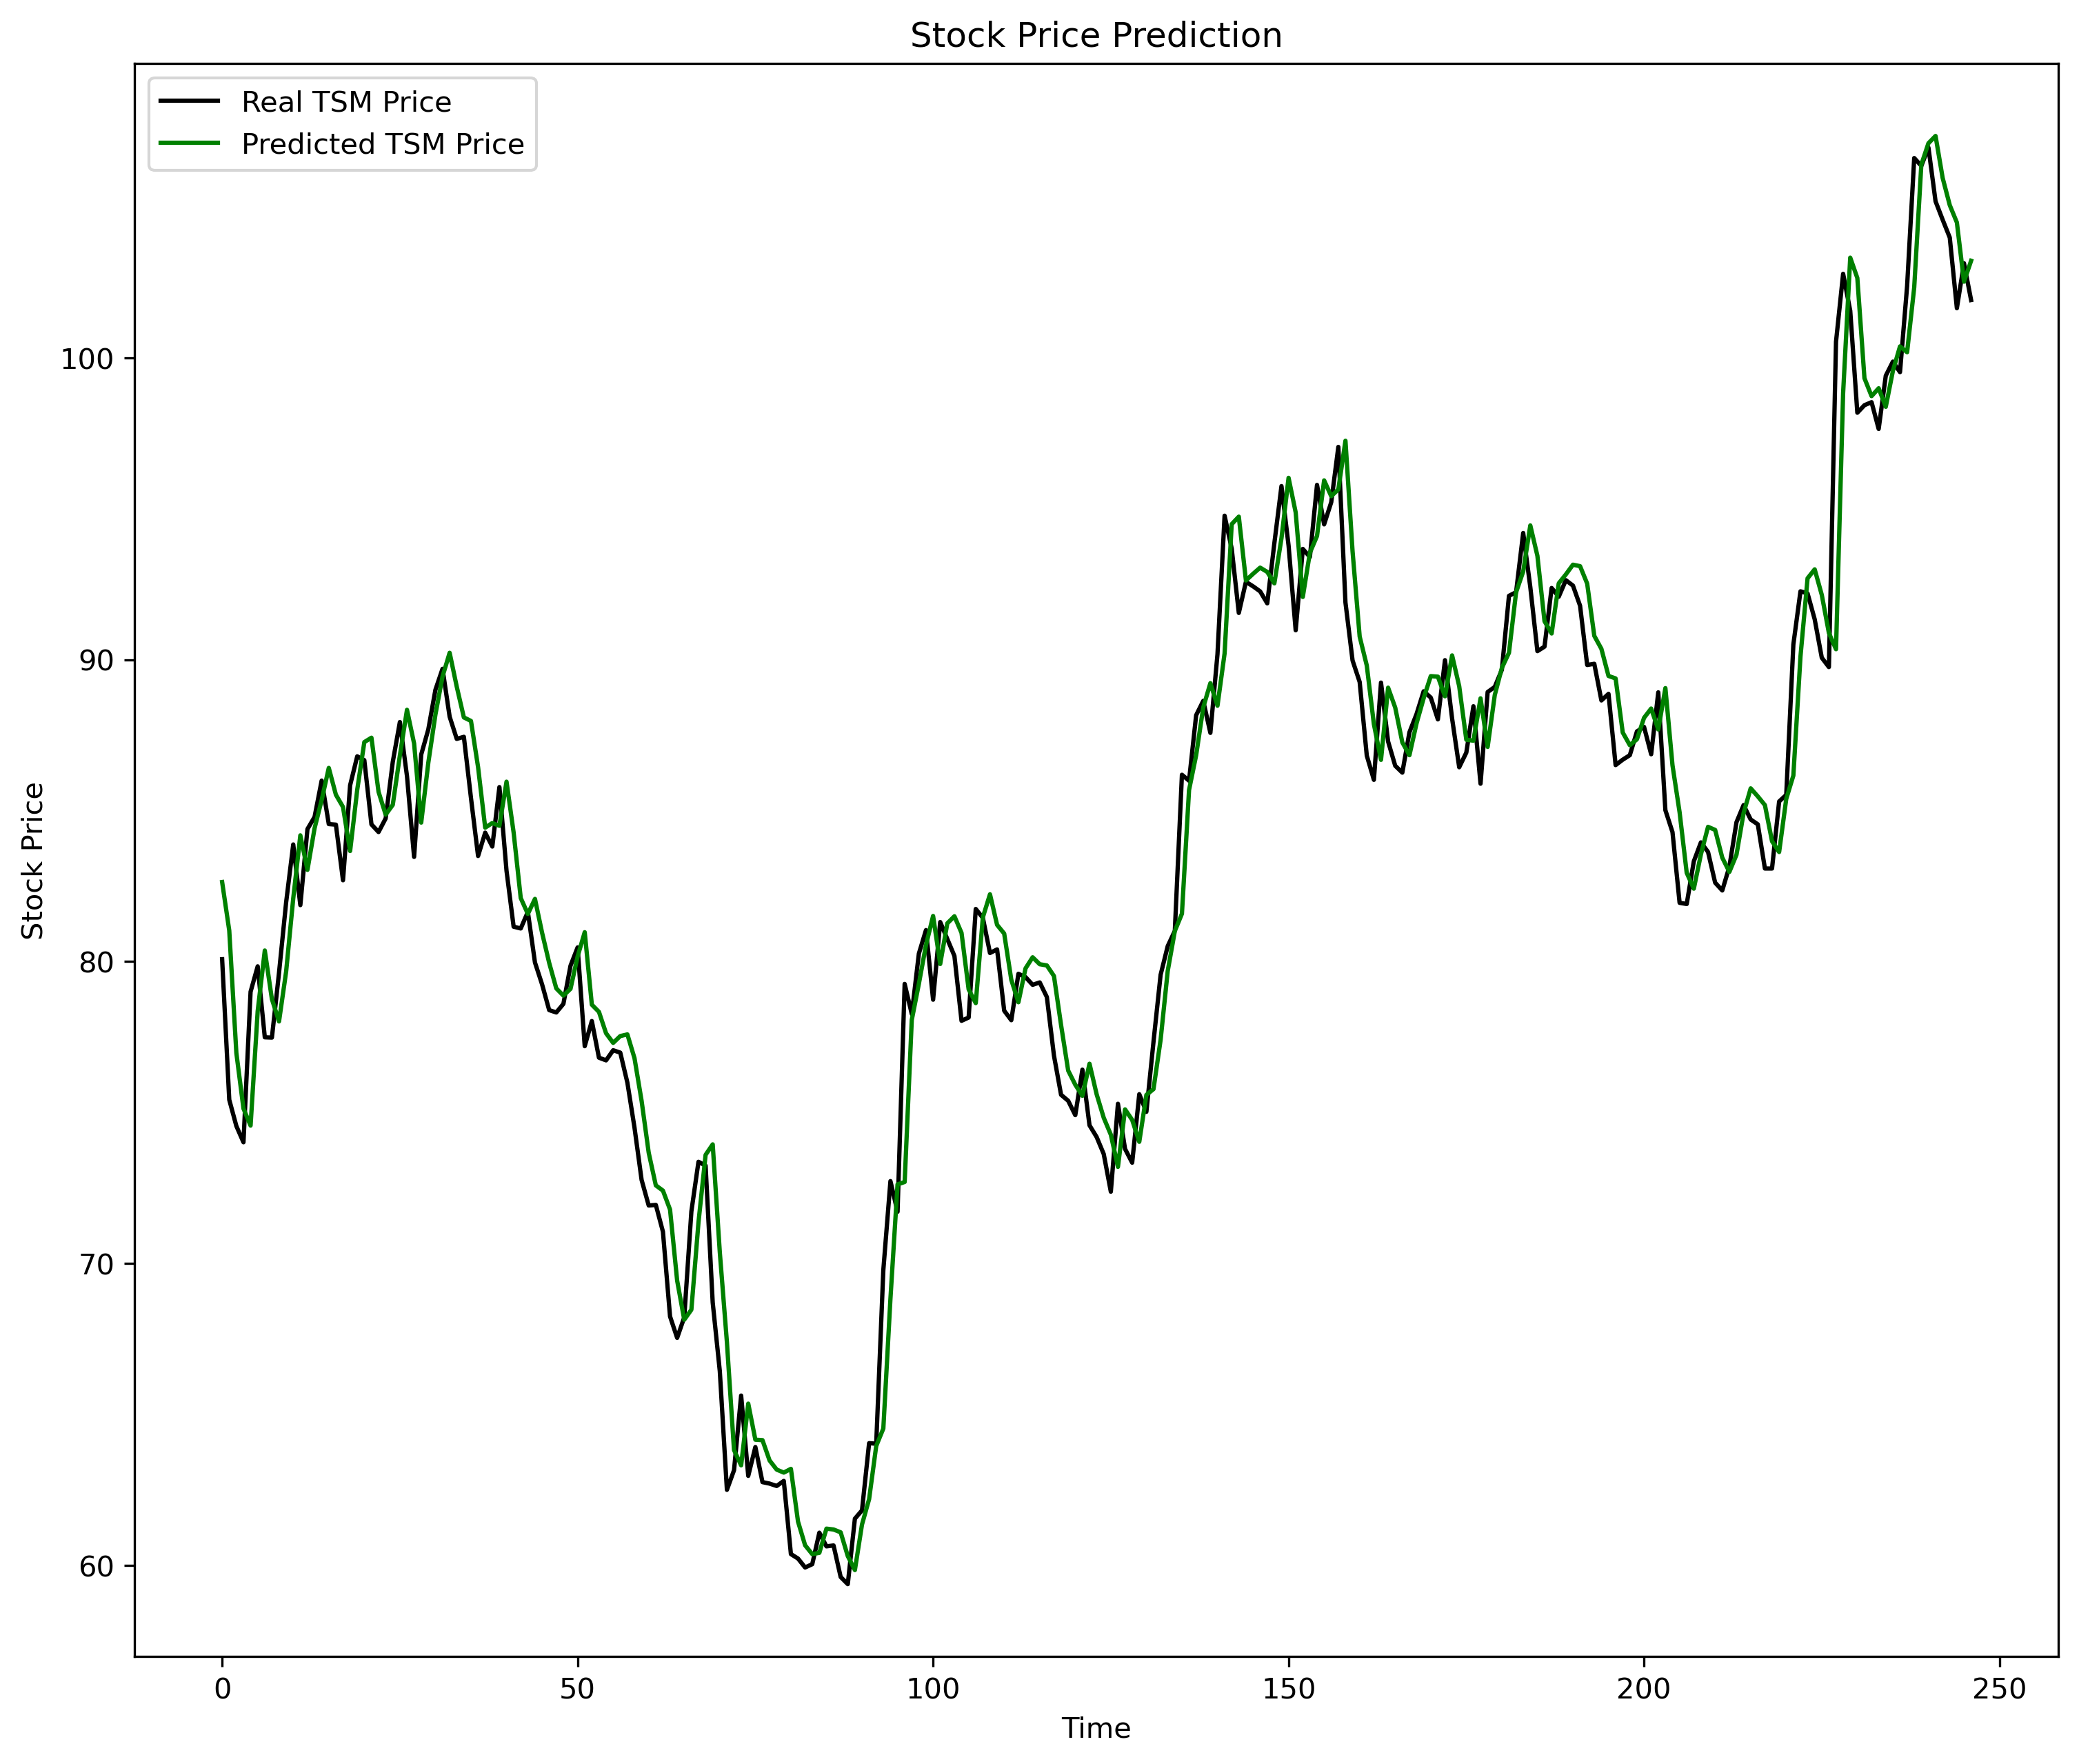

In [99]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real TSM Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted TSM Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [100]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [103]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 1.603
MSE: 4.341
RMSE: 2.083
MAPE: 1.957 %
SMAPE: 1.95 %
RAE: 0.199
MRAE: 0.0008044607175411183
MdRAE: 0.22 bench: 83.102
RSE: 0.041
RRSE: 0.202


In [161]:
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(units = 48,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 24,activation='relu'))
model.add(Dense(units = 1))
model.summary()
opt=Adam(learning_rate=0.001,beta_1=0.95)
model.compile(optimizer = opt, loss = 'mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 48)             9600      
                                                                 
 dropout (Dropout)           (None, 5, 48)             0         
                                                                 
 lstm_1 (LSTM)               (None, 24)                7008      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 16,633
Trainable params: 16,633
Non-trainable params: 0
_________________________________________________________________


In [162]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/300
25/25 [==============================] - 3s 26ms/step - loss: 0.1402 - val_loss: 0.2213
Epoch 2/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0308 - val_loss: 0.0033
Epoch 3/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.0018
Epoch 4/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 5/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 6/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 8/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/300
25/25 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/300
25/25 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 11

In [163]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

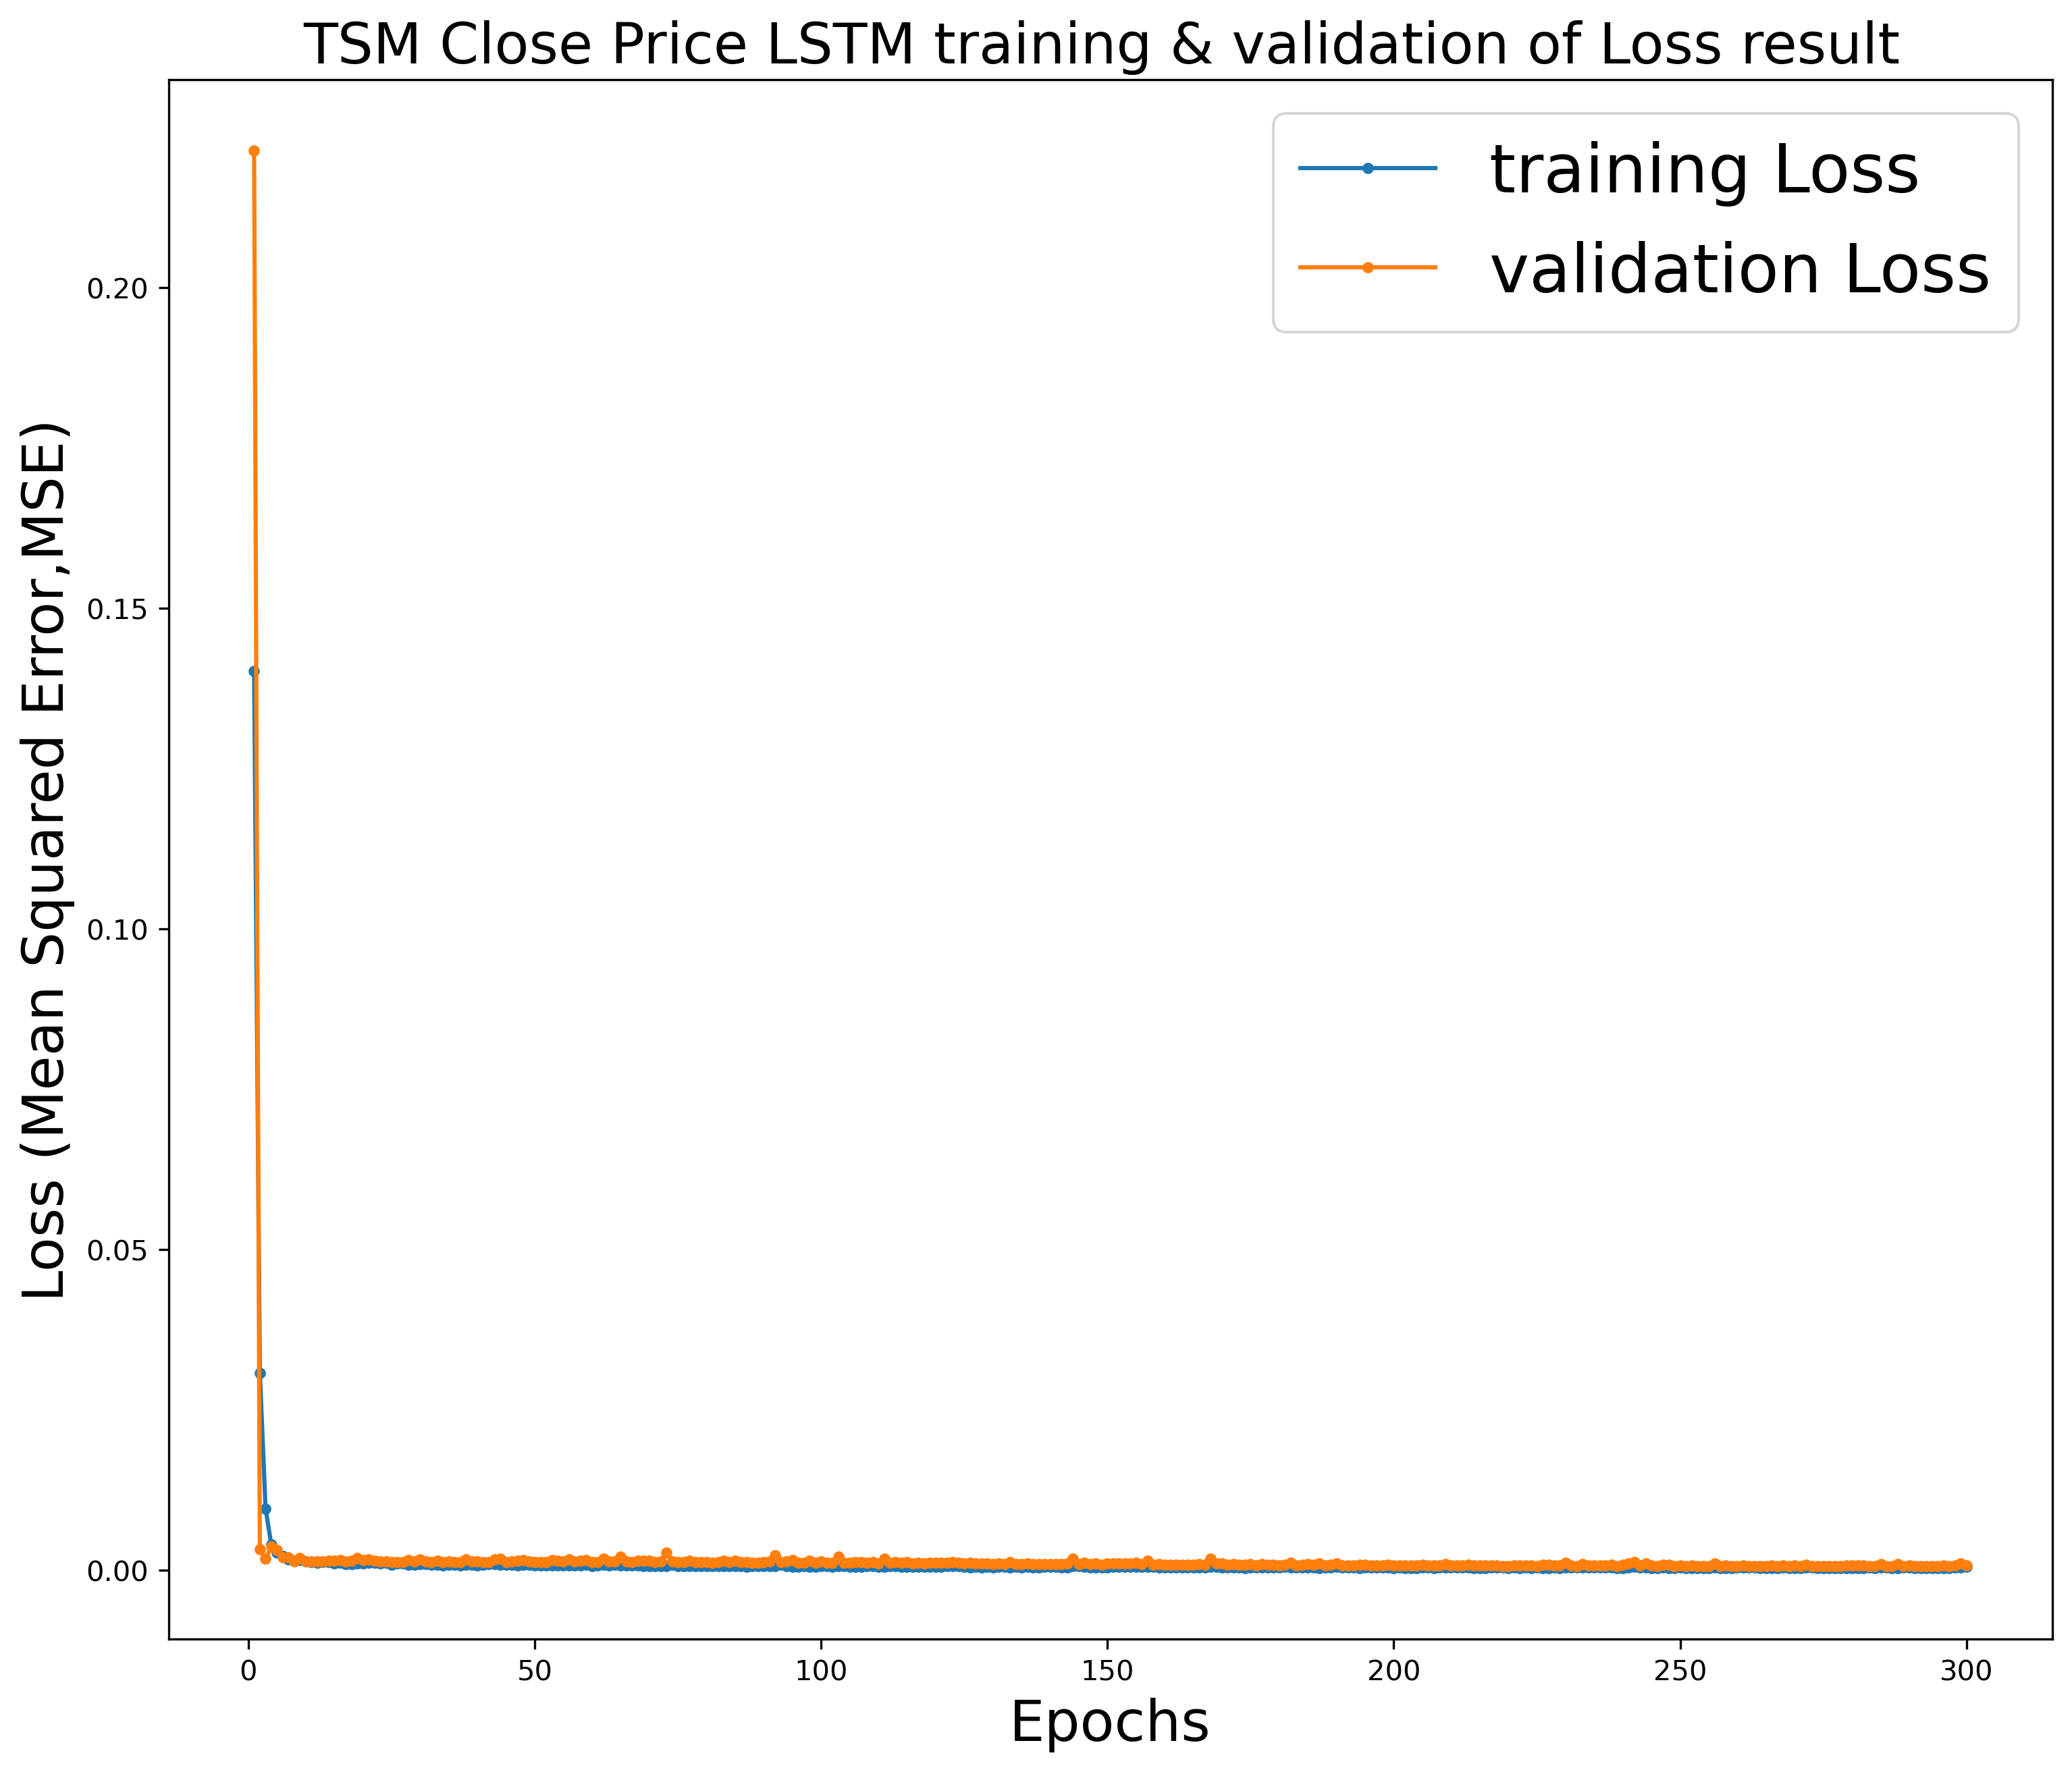

In [164]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('TSM Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [165]:
predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

8/8 [==============================] - 0s 2ms/step


In [166]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output2.csv', index=False)

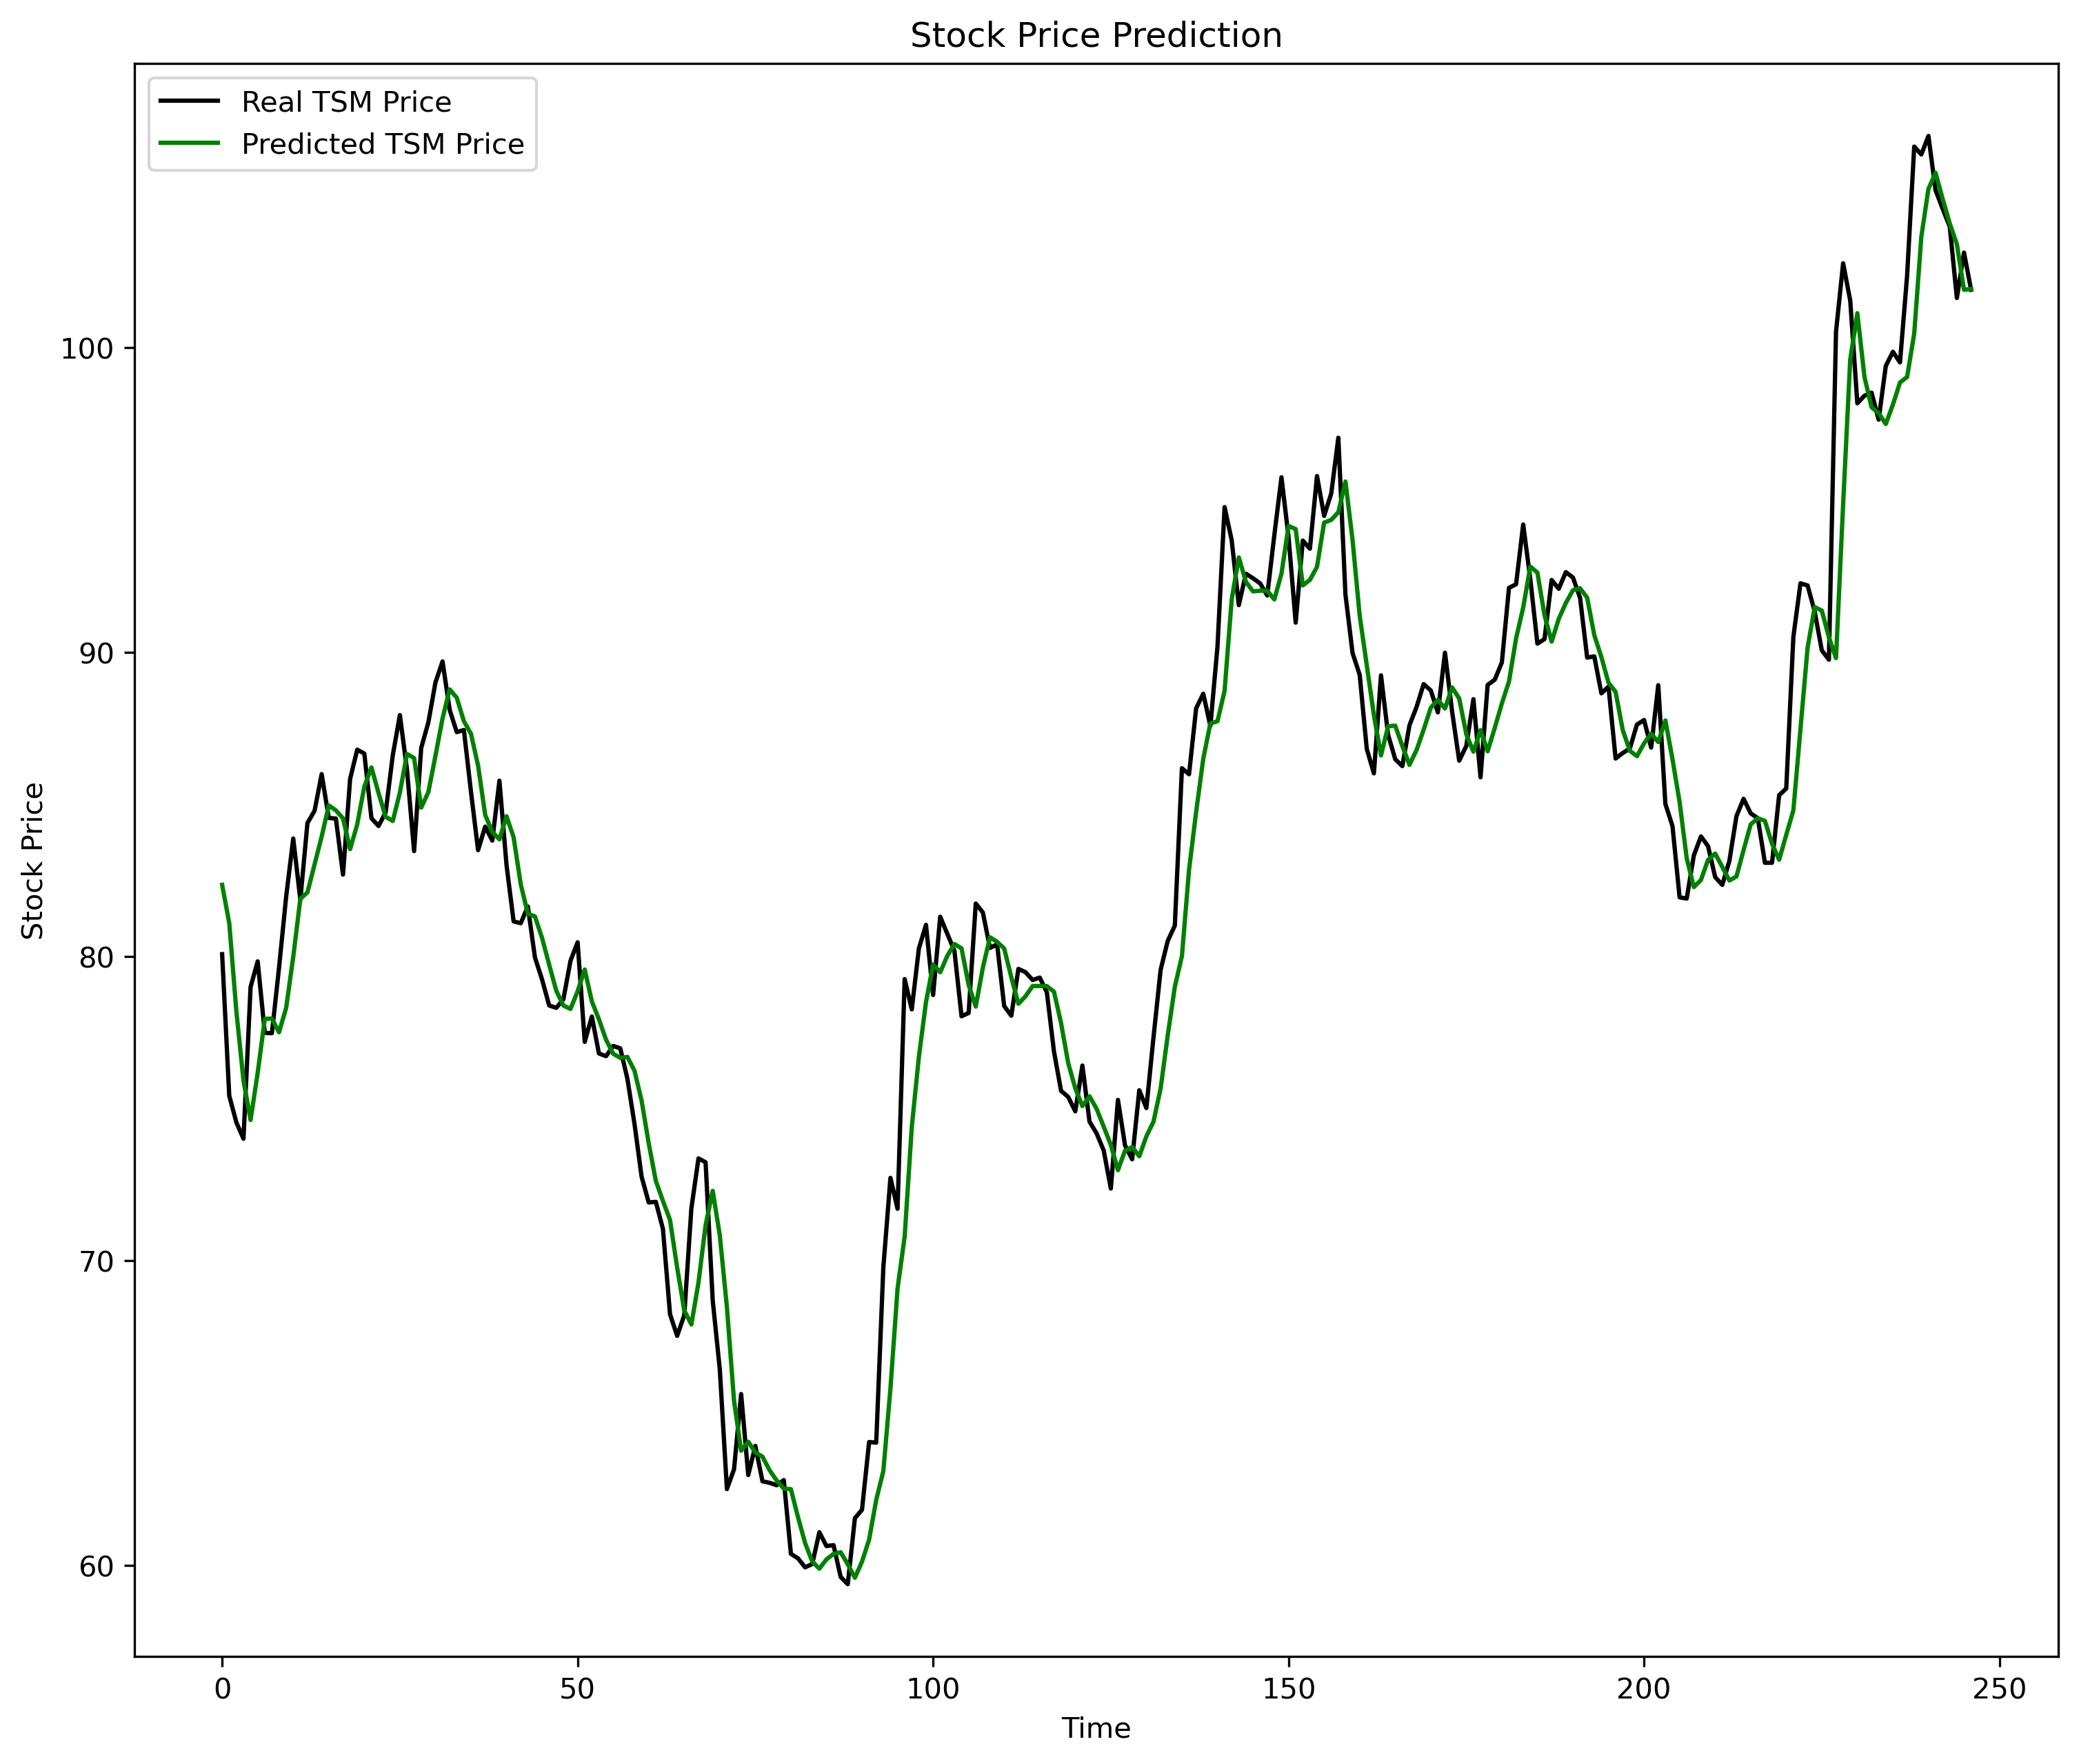

In [167]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real TSM Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted TSM Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [168]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 1.758
MSE: 5.548
RMSE: 2.355
MAPE: 2.137 %
SMAPE: 2.153 %
RAE: 0.218
MRAE: 0.0008821692292762014
MdRAE: 0.226 bench: 83.102
RSE: 0.052
RRSE: 0.228


In [219]:
keras.backend.clear_session()

model = Sequential([
    SimpleRNN(48, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

opt = Adam(learning_rate=0.0098, beta_1=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 48)                2400      
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 2,449
Trainable params: 2,449
Non-trainable params: 0
_________________________________________________________________


In [220]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.0214 - val_loss: 0.0101
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 6.4940e-04 - val_loss: 0.0019
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 3.9873e-04 - val_loss: 7.3427e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 3.0521e-04 - val_loss: 6.8162e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 2.9634e-04 - val_loss: 8.2313e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 2.8044e-04 - val_loss: 7.0082e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 2.6922e-04 - val_loss: 6.4856e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 2.8706e-04 - val_loss: 6.5693e-04
Epoch 10/100
25/25 [==============================] - 0s

In [221]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

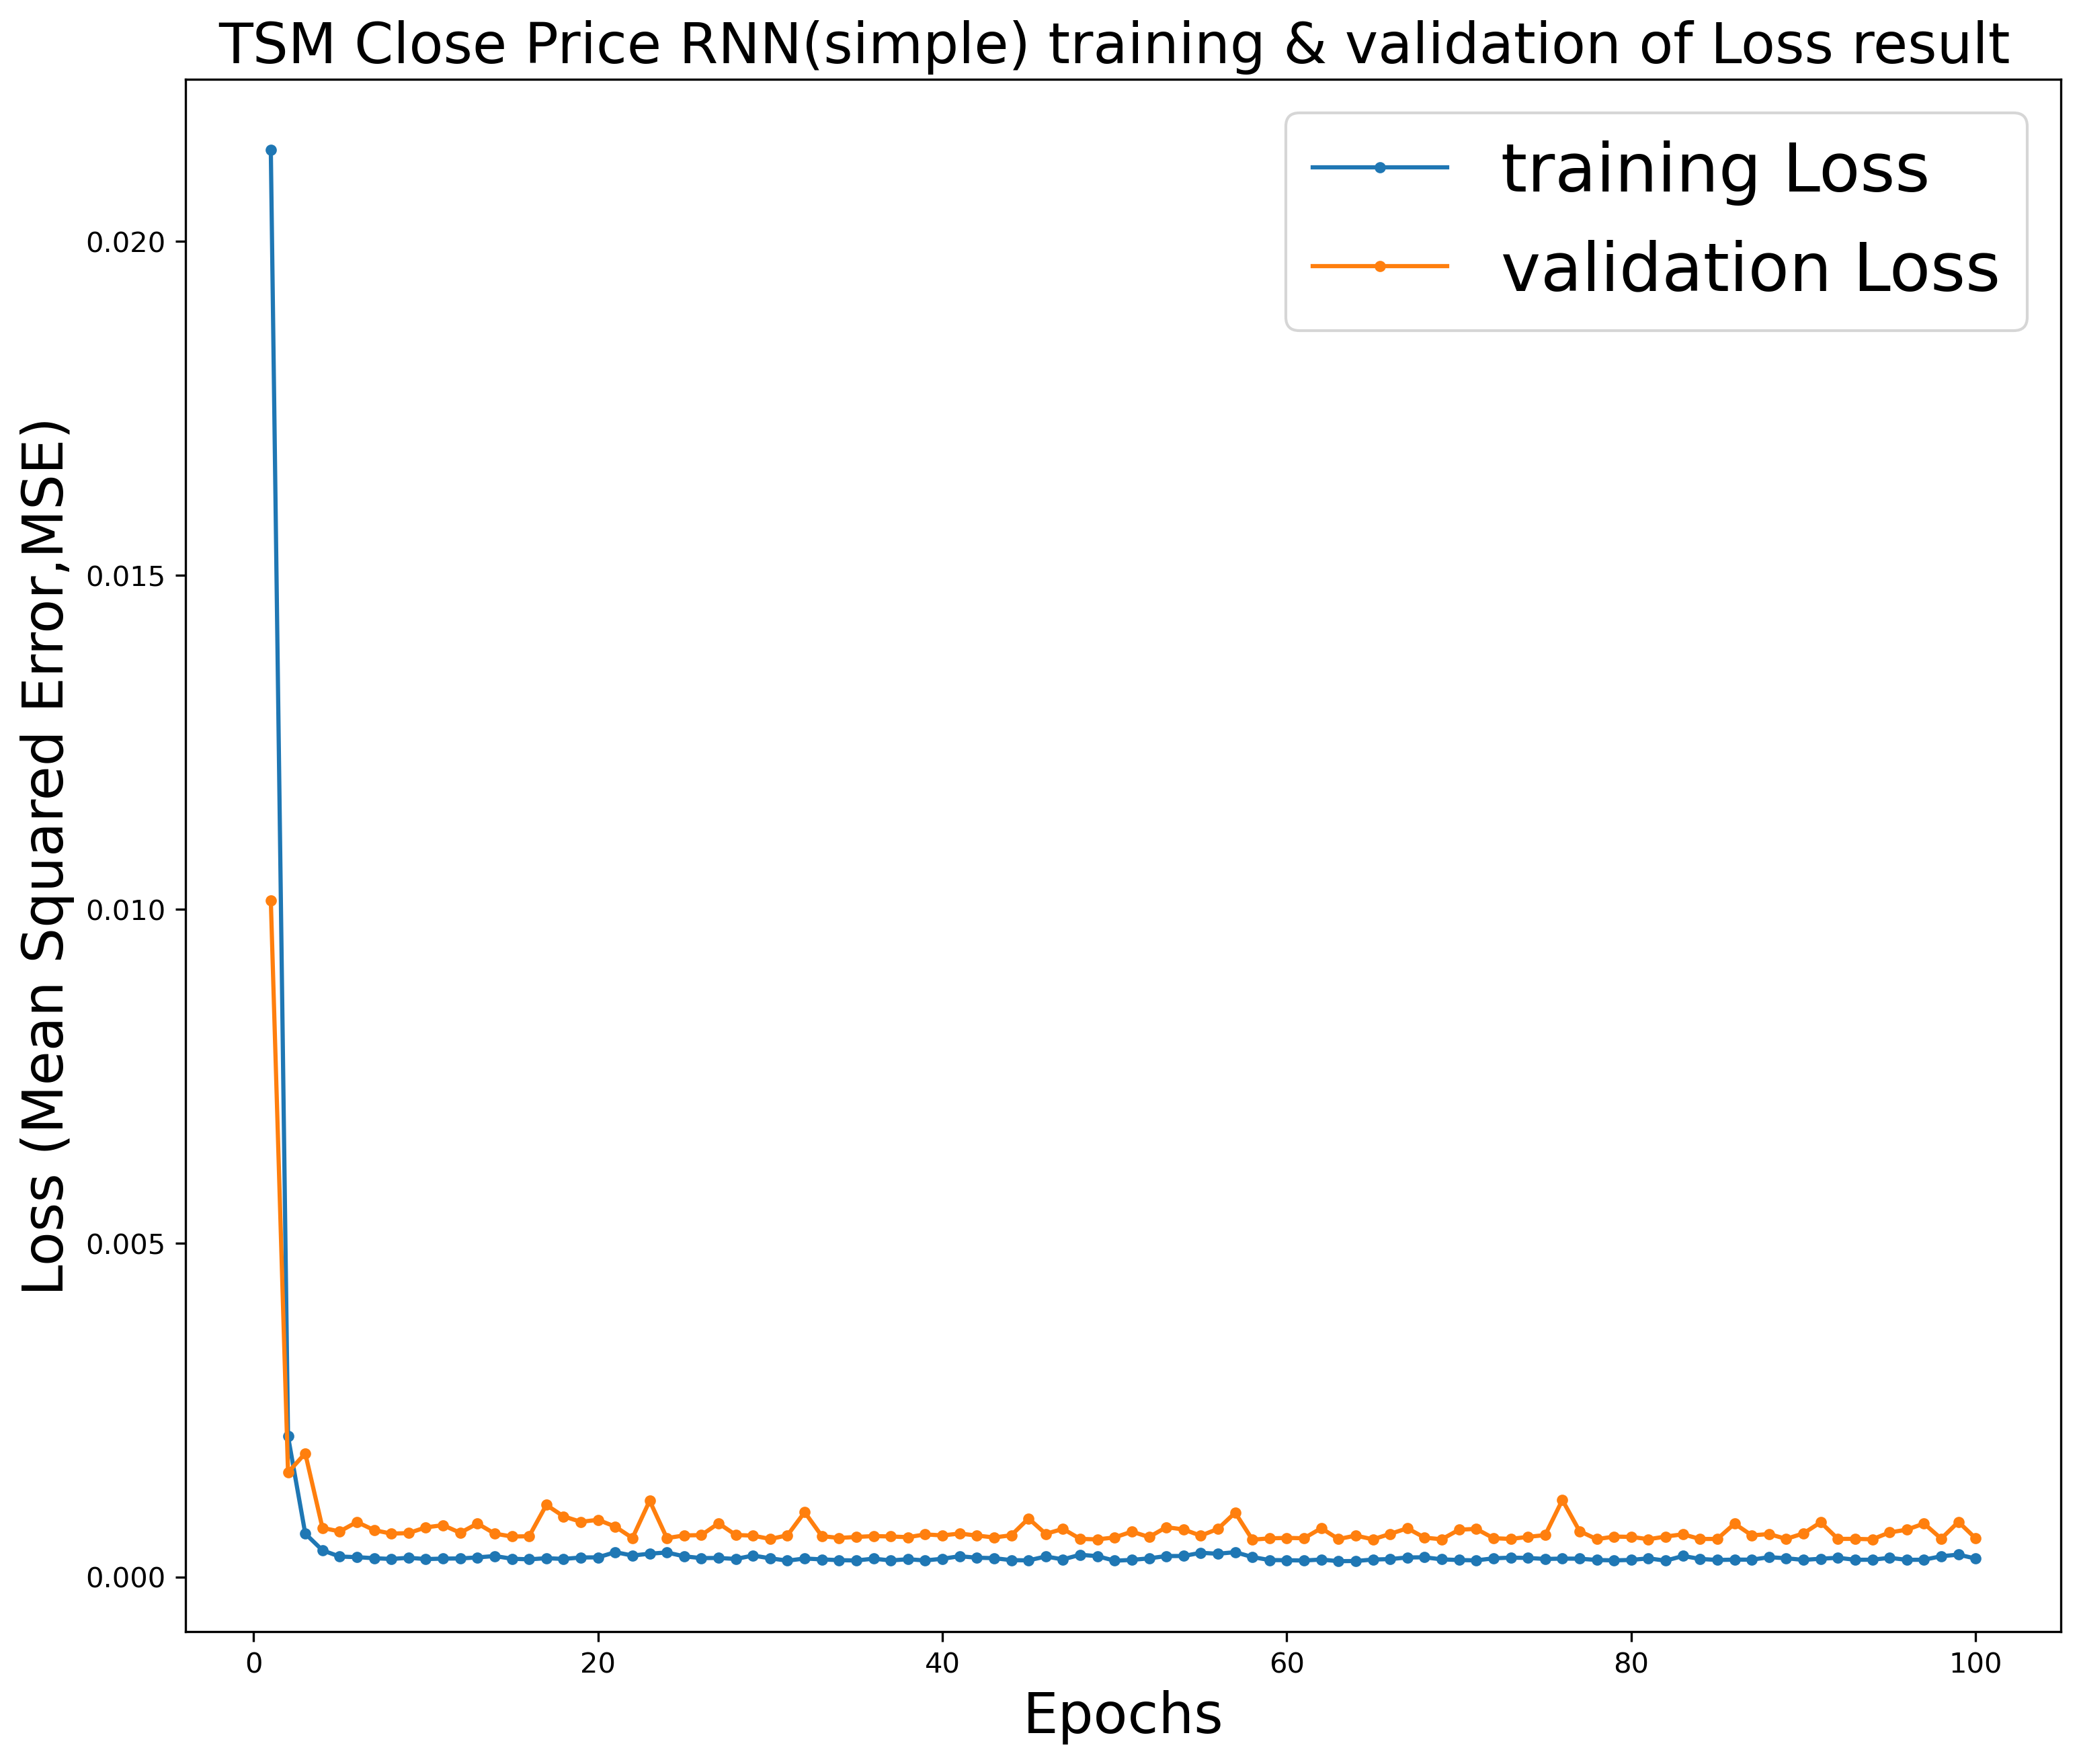

In [222]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('TSM Close Price RNN(simple) training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [223]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output3.csv', index=False)

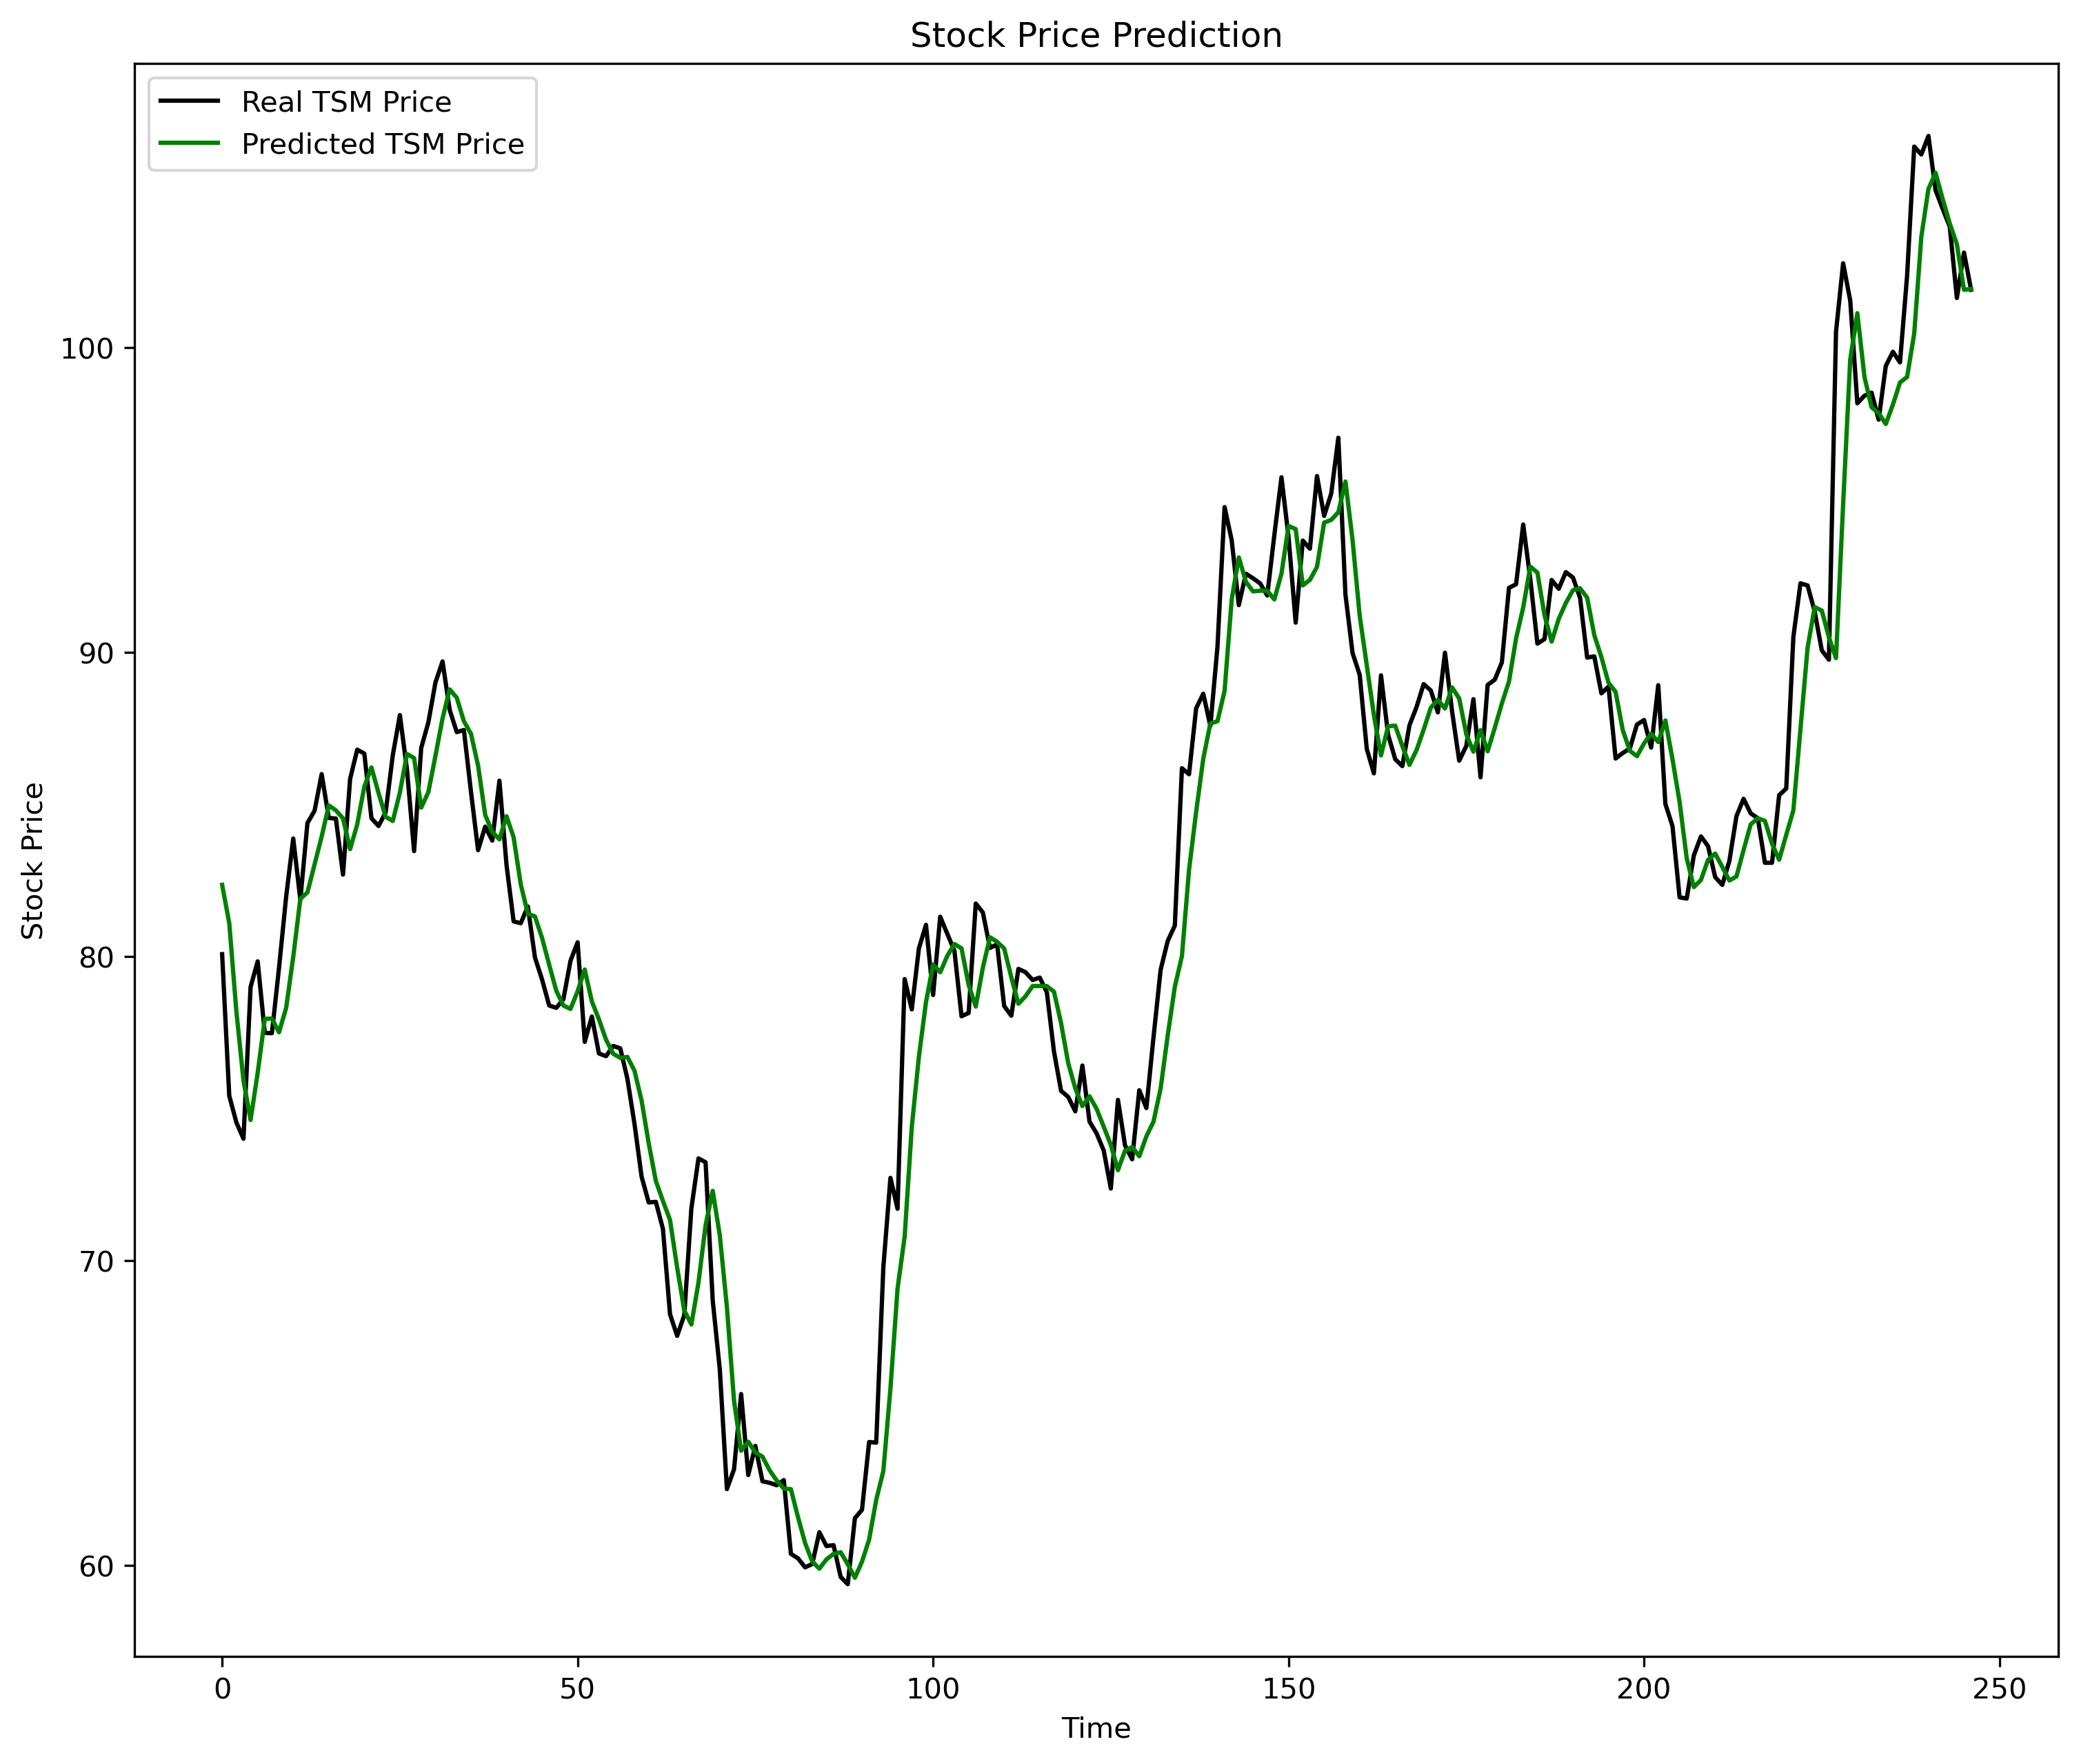

In [224]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real TSM Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted TSM Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [227]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 1.758
MSE: 5.548
RMSE: 2.355
MAPE: 2.137 %
SMAPE: 2.153 %
RAE: 0.218
MRAE: 0.0008821692292762014
MdRAE: 0.226 bench: 83.102
RSE: 0.052
RRSE: 0.228
